### Market Sentiment Dashboard

This notebook loads and visualizes the historical trend of market-wide sentiment indicators from the daily summary statistics file.

**Workflow:**
1.  **Setup:** Configure all necessary file paths.
2.  **Load Data:** Load the historical statistics data.
3.  **Plot Dashboard:** Generate and display a multi-panel dashboard of key market indicators.
4.  **Analyze Market Cap:** Calculate and plot the total market capitalization over time.

### Setup and Configuration

In [1]:
import sys
from pathlib import Path
import pandas as pd


# --- Project Path Setup ---
NOTEBOOK_DIR = Path.cwd()
ROOT_DIR = NOTEBOOK_DIR.parent
if str(ROOT_DIR) not in sys.path: sys.path.append(str(ROOT_DIR))
SRC_DIR = ROOT_DIR / 'src'
if str(SRC_DIR) not in sys.path: sys.path.append(str(SRC_DIR))

# Import our new plotting utility module
import plotting_utils 

# --- File Path Configuration ---
DATA_DIR = ROOT_DIR / 'data'
HISTORY_FILE_PATH = DATA_DIR / 'market_daily_summary_stats_history.csv'

# --- Notebook Setup ---
%load_ext autoreload
%autoreload 2

print(f"✅ Reading history from: {HISTORY_FILE_PATH}")

✅ Reading history from: c:\Users\ping\Files_win10\python\py311\stocks\data\market_daily_summary_stats_history.csv


### Step 1: Load and Prepare Data

In [ ]:
print("--- Step 1: Loading historical data ---")
try:
    df_history = pd.read_csv(HISTORY_FILE_PATH, index_col="Date", parse_dates=True)
    df_history.sort_index(inplace=True)
    print(f"✅ Successfully loaded data for {len(df_history)} dates.")
    display(df_history.head(3))
except FileNotFoundError:
    print(
        f"❌ ERROR: History file not found at '{HISTORY_FILE_PATH}'. Halting execution."
    )
    df_history = None

--- Step 1: Loading historical data ---
✅ Successfully loaded data for 134 dates.


,No._count,No._mean,No._std,No._min,No._25%,No._50%,No._75%,No._max,"Market Cap, M_count","Market Cap, M_mean",...,"MktCap AUM, M_75%","MktCap AUM, M_max",Rank_count,Rank_mean,Rank_std,Rank_min,Rank_25%,Rank_50%,Rank_75%,Rank_max
Date,,,,,,,,,,,,,,,,,,,,,
2025-04-25,1522.0,475.354796,335.633341,1.0,191.25,383.0,756.50,1160.0,1127.0,60926.08696,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-28,1522.0,474.942838,335.114619,1.0,191.25,383.0,754.75,1159.0,1127.0,61057.01863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-04-29,1494.0,468.742302,334.475094,1.0,188.00,376.5,738.75,1160.0,1099.0,62667.35214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 2: Generate Market Sentiment Dashboard


--- Step 2: Generating historical sentiment dashboard ---


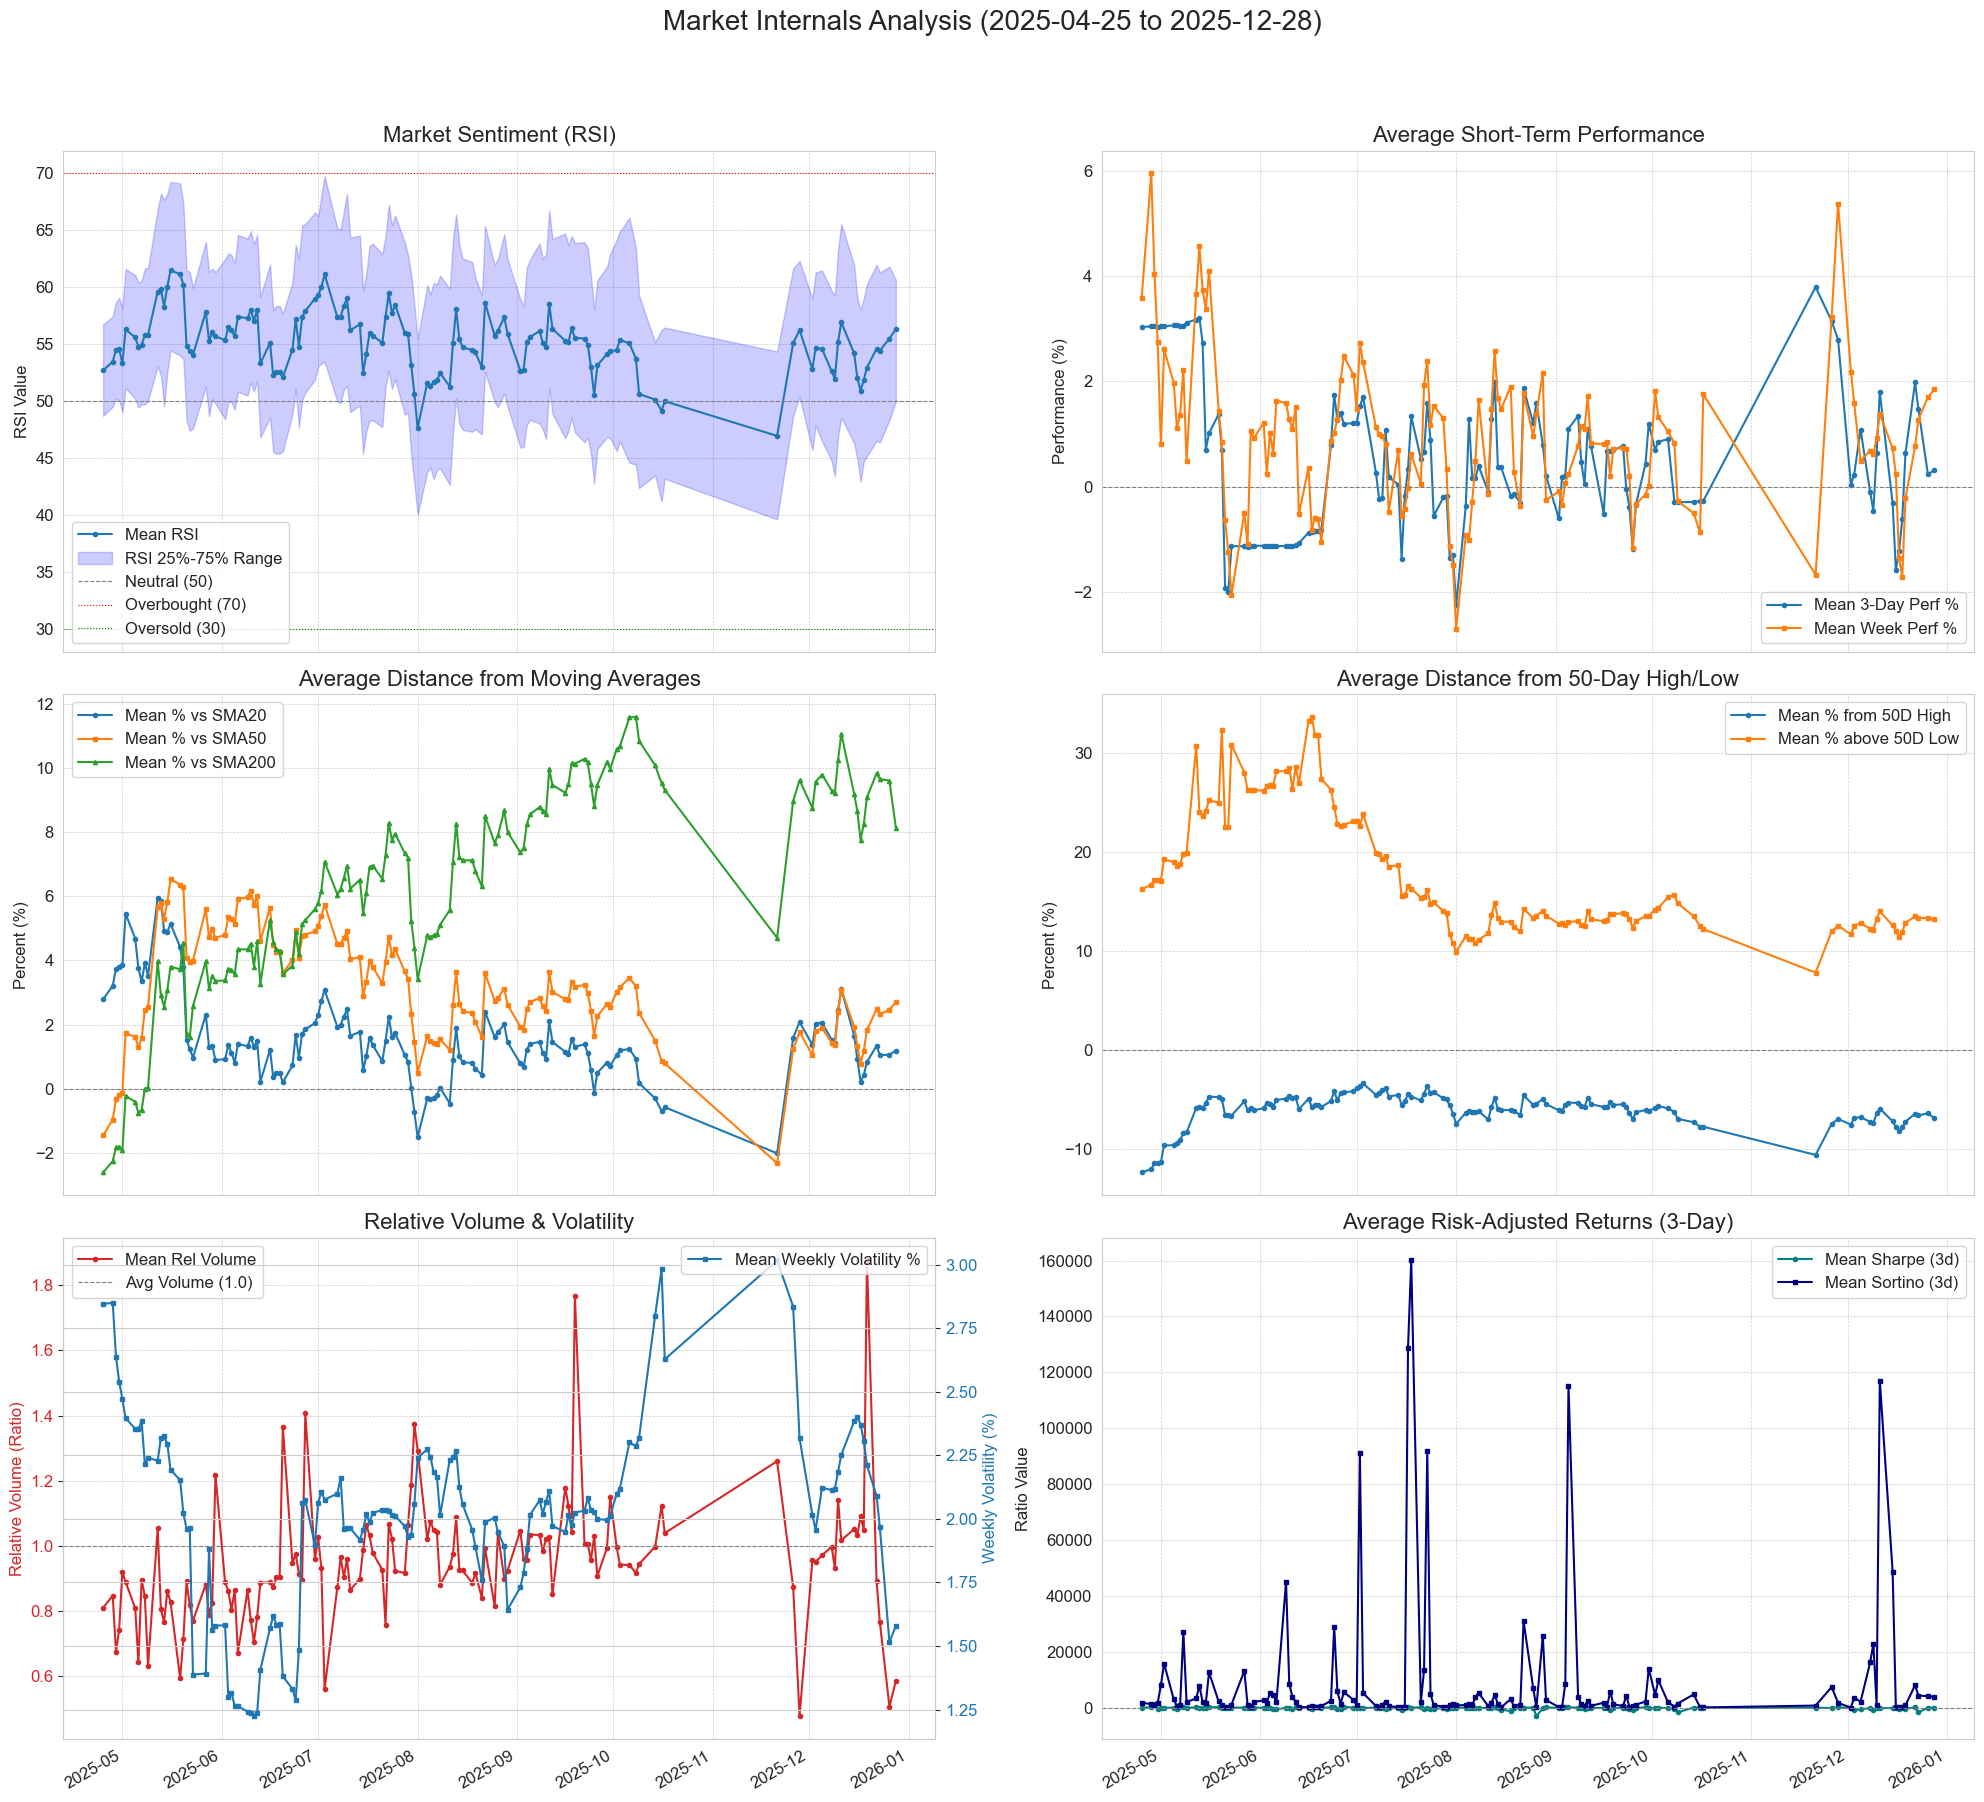

In [3]:
if df_history is not None:
    print("\n--- Step 2: Generating historical sentiment dashboard ---")
    # A single, clean call to our high-level plotting function.
    plotting_utils.plot_market_sentiment_dashboard(df_history)
else:
    print("Skipping dashboard generation.")

### Step 3: Analyze and Plot Total Market Cap


--- Step 3: Plotting Total Market Capitalization ---


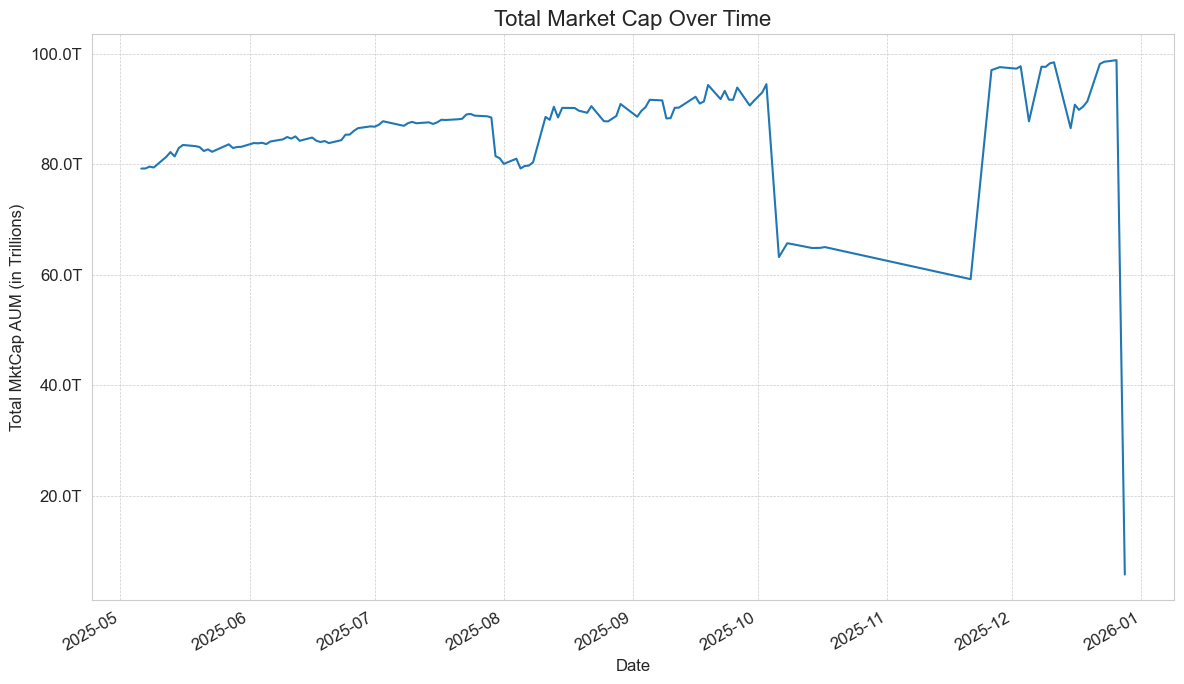

In [ ]:
if df_history is not None:
    print("\n--- Step 3: Plotting Total Market Capitalization ---")

    # 1. Calculate the total market cap time series
    df_total_mktcap_aum = (
        df_history["MktCap AUM, M_count"] * df_history["MktCap AUM, M_mean"]
    )
    df_total_mktcap_aum.name = "Total MktCap AUM"

    # 2. Call our general-purpose plotting function
    plotting_utils.plot_single_timeseries(
        series=df_total_mktcap_aum,
        title="Total Market Cap Over Time",
        ylabel="Total MktCap AUM (in Trillions)",
        y_formatter=plotting_utils.millions_to_trillions_formatter,  # Pass the formatter function
    )
else:
    print("Skipping market cap analysis.")